In [1]:
#IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisiionTreeClassifier

In [6]:
#Loading Dataset

import pandas as pd
data = pd.read_csv("C:\\Users\\vijay\\OneDrive\\Desktop\\diabetes.csv")


In [4]:
# Reading the data 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

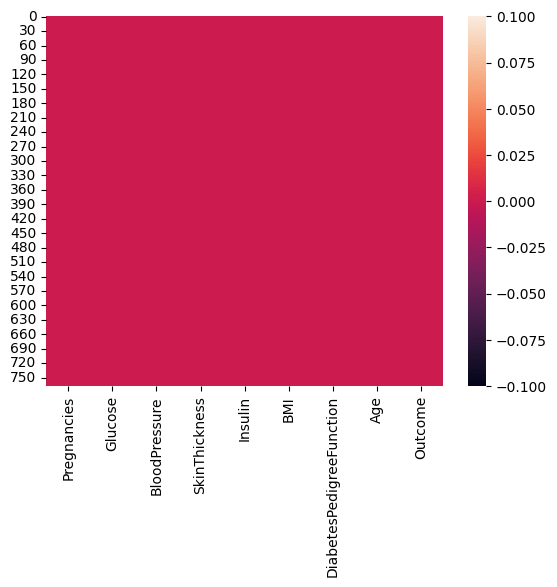

In [5]:
#Checking for missing values

import seaborn as sns
sns.heatmap(data.isnull())

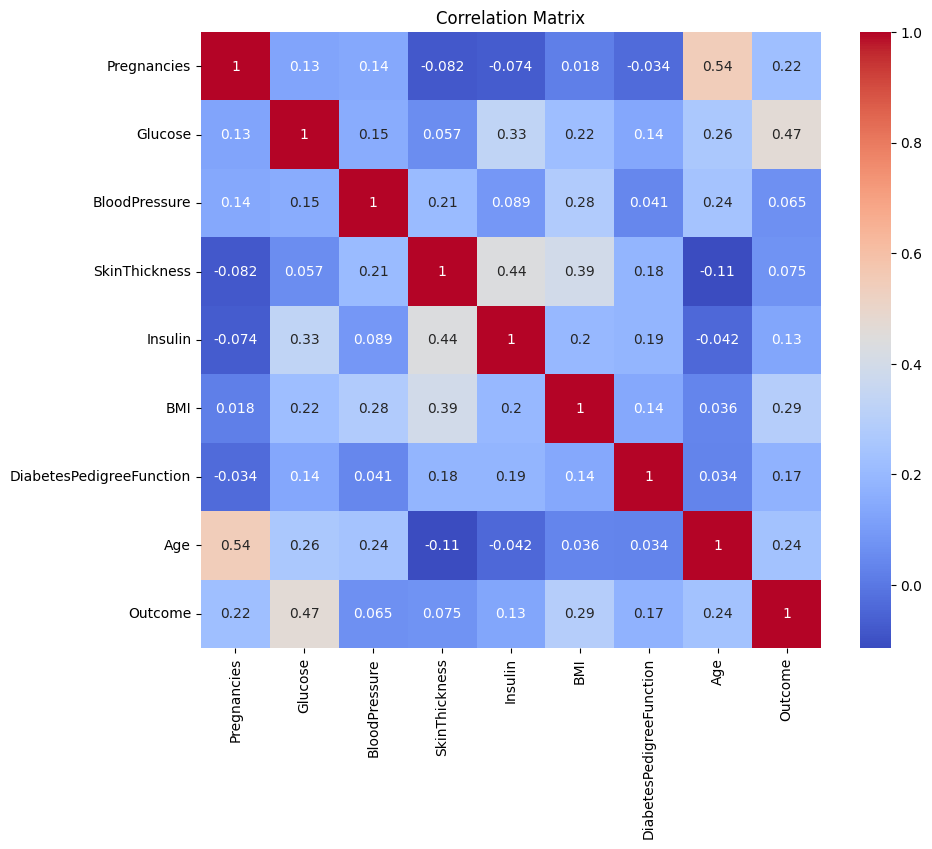

In [9]:
# Visualizing the Correlation

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Inputing with the median values for the said variables

variables_to_input = ['Glucose', 'BloodPressure', 'BMI', 'Insulin','DiabetesPedigreeFunction', 'SkinThickness', 'Age']

for var in variables_to_inpute:
    median_value = data[var].median()
    dat[var] = data[var].replace(0, median_value)
    

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data splitting
X = data.drop("Outcome",axis=1)
Y = data['Outcome']

# Spiltting data into training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((614, 8), (154, 8))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Intialize the LogisticRegression Model
logistic_regression_model = LogisticRegression()

#Train the model
logistic_regression_model.fit(X_train_scaled, Y_train)

#Prediction on test set
Y_pred = logistic_regression_model.predict(X_test_scaled)

# Caculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

#Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Classification Report 
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 80.52%
Confusion Matrix:
[[94 10]
 [20 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       104
           1       0.75      0.60      0.67        50

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Intialize the Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, Y_train)

# Predict on test set
Y_pred_rf = random_forest_model.predict(X_test_scaled)

#Caculate accuracy
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

#Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

#Classification Report 
class_report_rf = classification_report(Y_test, Y_pred_rf)

print(f"Random Forest Model Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)

Random Forest Model Accuracy: 80.52%

Confusion Matrix:
[[88 16]
 [20 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       104
           1       0.65      0.60      0.63        50

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [20]:
from sklearn.tree import DecisionTreeClassifier

# Intialize the Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)

#Train the model
decision_tree_model.fit(X_train_scaled, Y_train)

# Predict on test set
Y_pred_dt = decision_tree_model.predict(X_test_scaled)

#Caculate accuracy
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)

#Confusion Matrix
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_dt)

#Classification Report 
class_report_dt = classification_report(Y_test, Y_pred_dt)

print(f"Decision Tree Model Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)

Decision Tree Model Accuracy: 80.52%

Confusion Matrix:
[[77 27]
 [24 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       104
           1       0.49      0.52      0.50        50

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.67      0.67      0.67       154



In [24]:
feature_importance = random_forest_model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order 
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1                   Glucose    0.260738
5                       BMI    0.181126
7                       Age    0.130665
6  DiabetesPedigreeFunction    0.126564
2             BloodPressure    0.088255
0               Pregnancies    0.083596
3             SkinThickness    0.064855
4                   Insulin    0.064201
